In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac=1, random_state=3) #shuffling data

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

1. with heart disease: 644
2. without heart disease: 3596

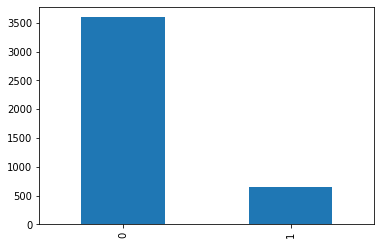

In [5]:
df['TenYearCHD'].value_counts().plot.bar()
plt.show()

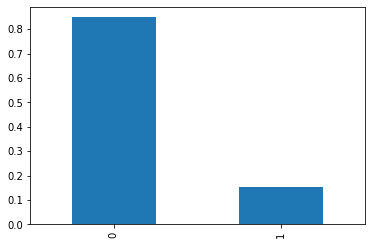

In [6]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()  #normalize used to get proportions
plt.show()

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
ms = df.isnull().sum()
ms[ms>0] #displaying only features with missing values

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

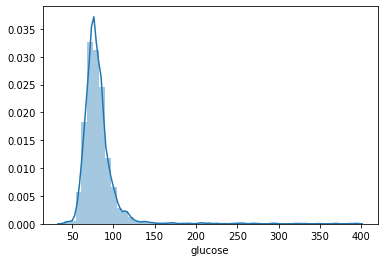

In [9]:
sns.distplot(df['glucose'].dropna())
plt.show()

In [10]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

Note: 
1. to maintain distribution of all data use forward fill or backward fill instead of median
2. fill and bfill might affect the sorting if any was already there in the data: so shuffle data initially to remove the sortinf present if any.

In [11]:
df = df.fillna(method='ffill')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [13]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis = 1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#gini is used as measure of purity bu default

In [15]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
# Create DOT data
dot_data = export_graphviz(dt, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found

In [ ]:
conda install GraphViz

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

Confusion matrix - train dataset: 
 [[2533    0]
 [   0  435]]
Overall accuracy of model - train dataset: 1.0
AUC Score - train dataset: 1.0


Confusion matrix - test dataset: 
 [[900 163]
 [159  50]]
Overall accuracy of model - test dataset: 0.7468553459119497
AUC Score - test dataset: 0.5429474224344749


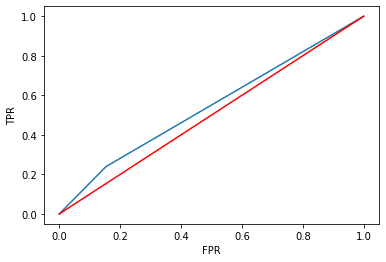

In [19]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train) 

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Hyperparameter Tuning Using Grid Search

In [20]:
import sklearn  
sklearn.metrics.SCORERS.keys()

#to get scoring techniques

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [26]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()
# dtc is the estimator

params={'max_depth':[2,3,4,5,6], 'min_samples_leaf':[1,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6,7,8,9,10],
        'criterion':['gini','entropy']}

gsearch=GridSearchCV(dtc,param_grid=params, cv=3, scoring='roc_auc')
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [27]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [29]:
gs = pd.DataFrame(gsearch.cv_results_) #result of all combinations tried
gs.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012185,0.003424,0.008248,0.001020,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414
1,0.014558,0.002234,0.008337,0.003279,gini,2,1,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414
2,0.014545,0.001034,0.008473,0.000468,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.65094,0.670307,0.663184,0.008696,414


Confusion matrix - train dataset: 
 [[2520   13]
 [ 402   33]]
Overall accuracy of model - train dataset: 0.8601752021563343
AUC Score - train dataset: 0.7284597338125252


Confusion matrix - test dataset: 
 [[1052   11]
 [ 202    7]]
Overall accuracy of model - test dataset: 0.8325471698113207
AUC Score - test dataset: 0.6754063384751111


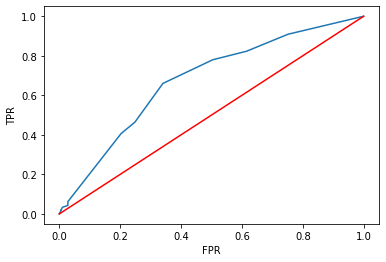

In [30]:
dt = DecisionTreeClassifier(**gsearch.best_params_)
# **: indicates keyword argument (like kwargs)


dt.fit(X_train, y_train) 

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [31]:
#auc score not great
#but test model better than before hyper parameter tuning

### Hyperparameter Tuning Using Randomized Search

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dtc=DecisionTreeClassifier()

params = {'max_depth' : sp_randint(2,20),  
          #random integer between 2 and 20: a range is specified, how many number of integers not specified
         'min_samples_leaf': sp_randint(1,20),
         'min_samples_split': sp_randint(2,40),
         'criterion' : ['gini','entropy']}


rsearch = RandomizedSearchCV(dtc, param_distributions=params, cv=3, n_iter=100, scoring='roc_auc') #sir gave n_iter=200
#n_iter=100: min = 100

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [41]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 16,
 'min_samples_split': 19}

In [42]:
pd.DataFrame(rsearch.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026595,0.008157,0.007313,0.001244,entropy,4,16,20,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.680748,0.650324,0.671155,0.667409,0.01270,12
1,0.013298,0.000470,0.006317,0.000470,gini,3,16,19,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.687971,0.658643,0.690164,0.678926,0.01437,1
2,0.037565,0.004484,0.008644,0.003082,entropy,18,11,38,"{'criterion': 'entropy', 'max_depth': 18, 'min...",0.610627,0.607134,0.610465,0.609409,0.00161,73


In [ ]:
#high std above means too much variation in data

Confusion matrix - train dataset: 
 [[2524    9]
 [ 416   19]]
Overall accuracy of model - train dataset: 0.8568059299191375
AUC Score - train dataset: 0.7151562592174107


Confusion matrix - test dataset: 
 [[1058    5]
 [ 202    7]]
Overall accuracy of model - test dataset: 0.8372641509433962
AUC Score - test dataset: 0.683962964796752


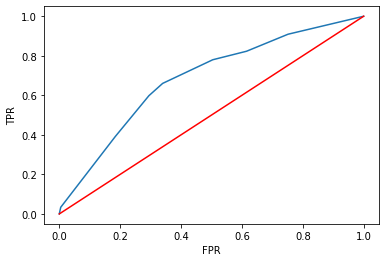

In [43]:
dt = DecisionTreeClassifier(**rsearch.best_params_)
# **: indicates keyword argument (like kwargs)


dt.fit(X_train, y_train) 

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()